# Proyek Analisis Data: [E-Commerce Public]
- **Nama:** [Aqustin Angel D Tambunan]
- **Email:** [M114B4KX0610@bangkit.academy]
- **ID Dicoding:** [Aqustin Angel D Tambunan M114B4KX0610]

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1. Produk apa saja yang memiliki reviews paling tinggi?
- Pertanyaan 2. Apa saja 10 produk yang memiliki minat jual yang tinggi?


## Import Semua Packages/Library yang Digunakan

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [1]:
#perintah ini digunakan untuk menampikan isi data order_reviews
import pandas as pd
order_items_dataset_df = pd.read_csv('order_items_dataset.csv')
order_items_dataset_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [2]:
#berfungsi menghubungksn drive dengan google colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
#pada perintah di bawah ini alamat penyimpanan data sudah sesua dengan drive yang dimiliki
import pandas as pd
order_items_dataset_df = pd.read_csv('/content/drive/MyDrive/E-Commerce Public Dataset/order_items_dataset.csv')
order_items_dataset_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [6]:
#menampilkan data orders_payment_dataset
import pandas as pd
order_payments_dataset_df = pd.read_csv('/content/drive/MyDrive/E-Commerce Public Dataset/order_payments_dataset.csv')
order_payments_dataset_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [8]:
#menampilkan data dari product_dtaset
import pandas as pd
products_dataset_df = pd.read_csv('/content/drive/MyDrive/E-Commerce Public Dataset/products_dataset.csv')
products_dataset_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


**Insight:**
- "from google.colab import drive
drive.mount('/content/drive')" code berikut berfungsi untuk mengidentifikasi berapa banyak entitas berbeda dalam kolom tertentu. serta distribusi data dan membantu dalam analisis data lebih lanjut.
- '/content/drive/MyDrive/E-Commerce Public Dataset/products_dataset.csv'


### Assessing Data

In [17]:
products_dataset_df.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


In [14]:
products_dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [16]:
order_payments_dataset_df.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


In [13]:
order_payments_dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [15]:
order_items_dataset_df.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


In [12]:
order_items_dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


**Insight:**
- "order_items_dataset_df.info()" contoh code berikut digunakan untuk memberikan ringkasan informasi tentang data frame yang disebut dengan 'order_items_dataset' begitu pula dengan code yang memiliki bentuk serupa.
- "order_items_dataset_df.describe()" code berikut ini berfungsi untuk mendapatkan ringkasan statistik untuk kolom non numerik, seperti jumlah nilai unik,frekuensini lai tertinggi,dan nilai tinggi itu sendiri.
-

### Cleaning Data

-contoh code 'order_items_dataset_df.duplicated().sum()'berfungsi untuk menghitung jumlah baris yang mengalami duplikat data pada data frame.


In [7]:
import pandas as pd
order_items_dataset_df = pd.read_csv('/content/drive/MyDrive/E-Commerce Public Dataset/order_items_dataset.csv')
order_items_dataset_df.duplicated().sum()


0

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
import pandas as pd
order_payments_dataset_df = pd.read_csv('/content/drive/MyDrive/E-Commerce Public Dataset/order_payments_dataset.csv')
order_payments_dataset_df.duplicated().sum()

0

In [10]:
import pandas as pd
products_dataset_df = pd.read_csv('/content/drive/MyDrive/E-Commerce Public Dataset/products_dataset.csv')
products_dataset_df.duplicated().sum()

0

terlihat hasil dari pada 3 code diatas menunjukkan tidak adanya file yang duplikat di dalam masing-masing data frame.

-Code untuk memeriksa Missing Value:

In [11]:
import pandas as pd
products_dataset_df = pd.read_csv('/content/drive/MyDrive/E-Commerce Public Dataset/products_dataset.csv')
products_dataset_df.isna().sum()

,0
product_id,0
product_category_name,610
product_name_lenght,610
product_description_lenght,610
product_photos_qty,610
product_weight_g,2
product_length_cm,2
product_height_cm,2
product_width_cm,2


In [12]:
import pandas as pd
order_payments_dataset_df = pd.read_csv('/content/drive/MyDrive/E-Commerce Public Dataset/order_payments_dataset.csv')
order_payments_dataset_df.isna().sum()

,0
order_id,0
payment_sequential,0
payment_type,0
payment_installments,0
payment_value,0


In [13]:
import pandas as pd
order_items_dataset_df = pd.read_csv('/content/drive/MyDrive/E-Commerce Public Dataset/order_items_dataset.csv')
order_items_dataset_df.isna().sum()

,0
order_id,0
order_item_id,0
product_id,0
seller_id,0
shipping_limit_date,0
price,0
freight_value,0


In [14]:
import pandas as pd
order_items_dataset_df = pd.read_csv('/content/drive/MyDrive/E-Commerce Public Dataset/order_items_dataset.csv')
order_items_dataset_df.order_item_id.duplicated()

,order_item_id
0,False
1,True
2,True
3,True
4,True
...,...
112645,True
112646,True
112647,True
112648,True


## Exploratory Data Analysis (EDA)

In [19]:
import pandas as pd
order_items_dataset_df = pd.read_csv('/content/drive/MyDrive/E-Commerce Public Dataset/order_items_dataset.csv')
order_items_dataset_df.groupby(by="order_item_id").agg({"order_item_id":"nunique",
"price":["max","min","mean","std"]})

order_item_id    price                              
                    nunique      max   min        mean         std
order_item_id                                                     
1                         1  6735.00  0.85  125.964327  191.375106
2                         1  2299.95  0.85   85.456052  106.398657
3                         1  1790.00  1.20   78.004534  102.512099
4                         1  1790.00  1.20   77.243161  109.690934
5                         1  1680.00  1.20   75.561978  112.195068
6                         1  1680.00  1.20   76.165508  131.322562
7                         1  1680.00  1.20  100.711897  218.494980
8                         1  1680.00  1.20  120.766944  274.289985
9                         1   284.99  1.20   80.356071   62.481293
10                        1   284.99  1.20   81.569200   62.067878
11                        1   179.99  1.20   60.147059   45.643951
12                        1   108.00  1.20   51.059231   37.345170
13                        1   100.00  1.20   54.421250   34.266791
14                        1   100.00  1.20   57.911429   35.443230
15                        1   100.00  1.20   63.278000   40.658774
16                        1   100.00  1.20   66.633333   56.670657
17                        1   100.00  1.20   66.633333   56.670657
18                        1   100.00  1.20   66.633333   56.670657
19                        1   100.00  1.20   66.633333   56.670657
20                        1   100.00  1.20   66.633333   56.670657
21                        1     7.80  7.80    7.800000         NaN

### Explore ...

**Insight:**
-"order_items_dataset_df.groupby(by="order_item_id").agg({"order_item_id":"nunique", "price":["max","min","mean","std"]})"
contoh code berikut ini melakukan beberapa langkah analisis data diantaranya:
1."groupby(by="order_item_id")" yang berfungsi untuk mengelompokan data frame berdasarkan kolom 'order_item_id' berarti semua baris yang memiliki 'order_item_id'yang sama.

2."agg({...})" berfungsi untuk menerapkan fungsi agregasi pada grup yang sudah dibentuk.

3."{"order_item_id":"nunique"}"menghitung jumlah nilai unik 'nunique' dari 'order_item_id' dalam setiap grup.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Produk apa saja yang memiliki reviews paling tinggi?

10 Produk dengan Jumlah Review Paling Tinggi:
product_category_name
cama_mesa_banho           11115
beleza_saude               9670
esporte_lazer              8641
moveis_decoracao           8334
informatica_acessorios     7827
utilidades_domesticas      6964
relogios_presentes         5991
telefonia                  4545
ferramentas_jardim         4347
automotivo                 4235
Name: order_item_id, dtype: int64


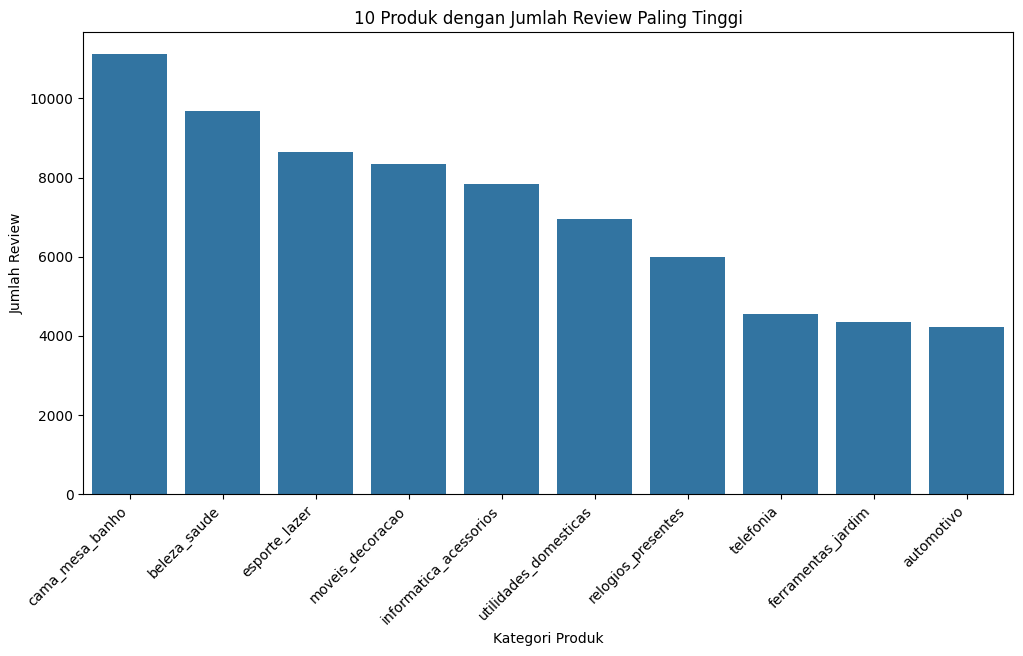

In [21]:
# prompt: produk apa saja yang memilki reviews paling tinggi
# explore data tersebut dari products_dataset.csv

import pandas as pd
import matplotlib.pyplot as plt
# Gabungkan data products_dataset dan order_items_dataset berdasarkan product_id
merged_df = pd.merge(products_dataset_df, order_items_dataset_df, on='product_id', how='inner')

# Hitung jumlah review untuk setiap produk
product_reviews_count = merged_df.groupby('product_category_name')['order_item_id'].count().sort_values(ascending=False)

# Tampilkan 10 produk dengan jumlah review paling tinggi
top_10_products_reviews = product_reviews_count.head(10)

print("10 Produk dengan Jumlah Review Paling Tinggi:")
print(top_10_products_reviews)

# Visualisasikan hasil dengan bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_products_reviews.index, y=top_10_products_reviews.values)
plt.xlabel("Kategori Produk")
plt.ylabel("Jumlah Review")
plt.title("10 Produk dengan Jumlah Review Paling Tinggi")
plt.xticks(rotation=45, ha="right")
plt.show()


### Pertanyaan 2:Apa saja 10 produk yang memiliki minat jual yang tinggi?

Top 10 Products with the Highest Number of Orders:
product_id
aca2eb7d00ea1a7b8ebd4e68314663af    527
99a4788cb24856965c36a24e339b6058    488
422879e10f46682990de24d770e7f83d    484
389d119b48cf3043d311335e499d9c6b    392
368c6c730842d78016ad823897a372db    388
53759a2ecddad2bb87a079a1f1519f73    373
d1c427060a0f73f6b889a5c7c61f2ac4    343
53b36df67ebb7c41585e8d54d6772e08    323
154e7e31ebfa092203795c972e5804a6    281
3dd2a17168ec895c781a9191c1e95ad7    274
Name: order_id, dtype: int64


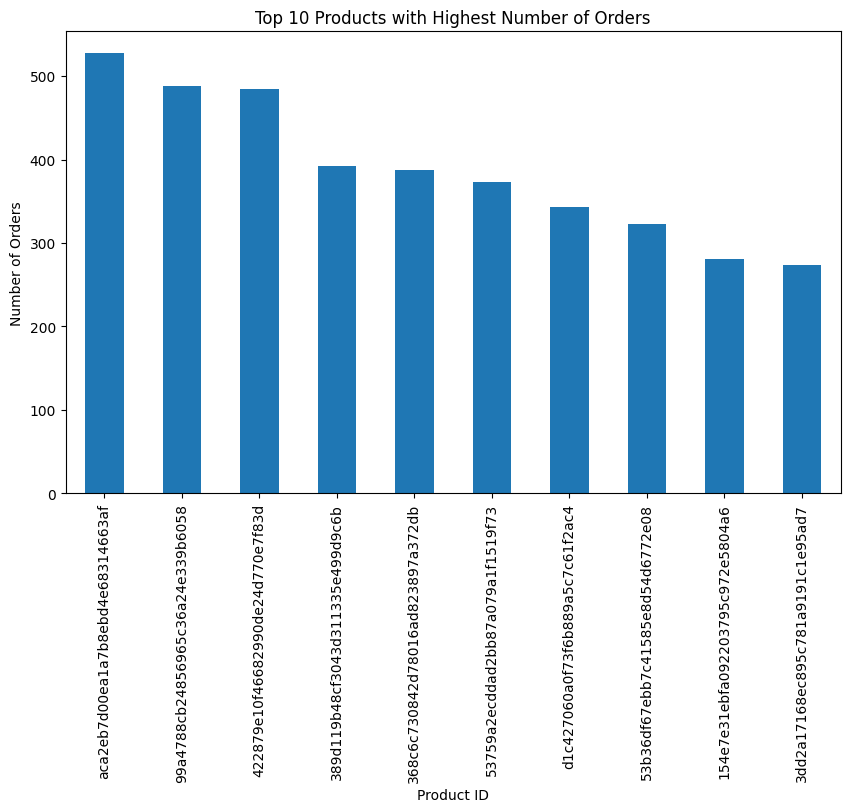

In [20]:
# prompt: apa saja 10 produk yang memiliki  minat jual yang tinggi explore lah dari data order_items_dataset.csv

import pandas as pd
import matplotlib.pyplot as plt
# Group by product ID and count the number of orders for each product
product_order_counts = order_items_dataset_df.groupby('product_id')['order_id'].count()

# Sort the product order counts in descending order and get the top 10
top_10_products = product_order_counts.sort_values(ascending=False).head(10)

# Print the top 10 products with the highest number of orders
print("Top 10 Products with the Highest Number of Orders:")
print(top_10_products)

# You can further analyze these products by merging with the products dataset to get more information like product category or description.

# Example: Merge with products dataset to get product details
# top_10_products_with_details = pd.merge(top_10_products, products_dataset_df, on='product_id', how='left')
# print(top_10_products_with_details)

# You can also visualize the top 10 products using a bar chart.
plt.figure(figsize=(10, 6))
top_10_products.plot(kind='bar')
plt.title('Top 10 Products with Highest Number of Orders')
plt.xlabel('Product ID')
plt.ylabel('Number of Orders')
plt.show()


**Insight:**
- 1.Pada pertanyaan no 1, secara keseluruhann memeberikan wawasan tentNG Produk yang memiliki daya tarik yang tinggi di pasar, membantu dlam pengambilan keputusan yang lebih baik  terkait dengan strategi bisnis dan pemasaran.
-2.Pada pertanyaan no 2, Secara keseluruhan, analisis ini memberikan wawasan berharga yang dapat digunakan untuk membuat strategis lebih baik dalam pengolaan produk dan pemasaran, dengan tujuan akhir meningkatkan penjualan dan kepuasan pelanggan.

## Analisis Lanjutan (Opsional)

-Menghitung review perkategori produk

**Insight:**
- Analisis menunjukkan kategori produk dengan jumlah review tertinggi.
- terdapat kemungkinan hubungan antara jumlah review dan volume penjualan.
-Kategori dengan sedikit review namun harga yangg tinggi dapat menjadi fokus  pemasaran yang lebih agresif.

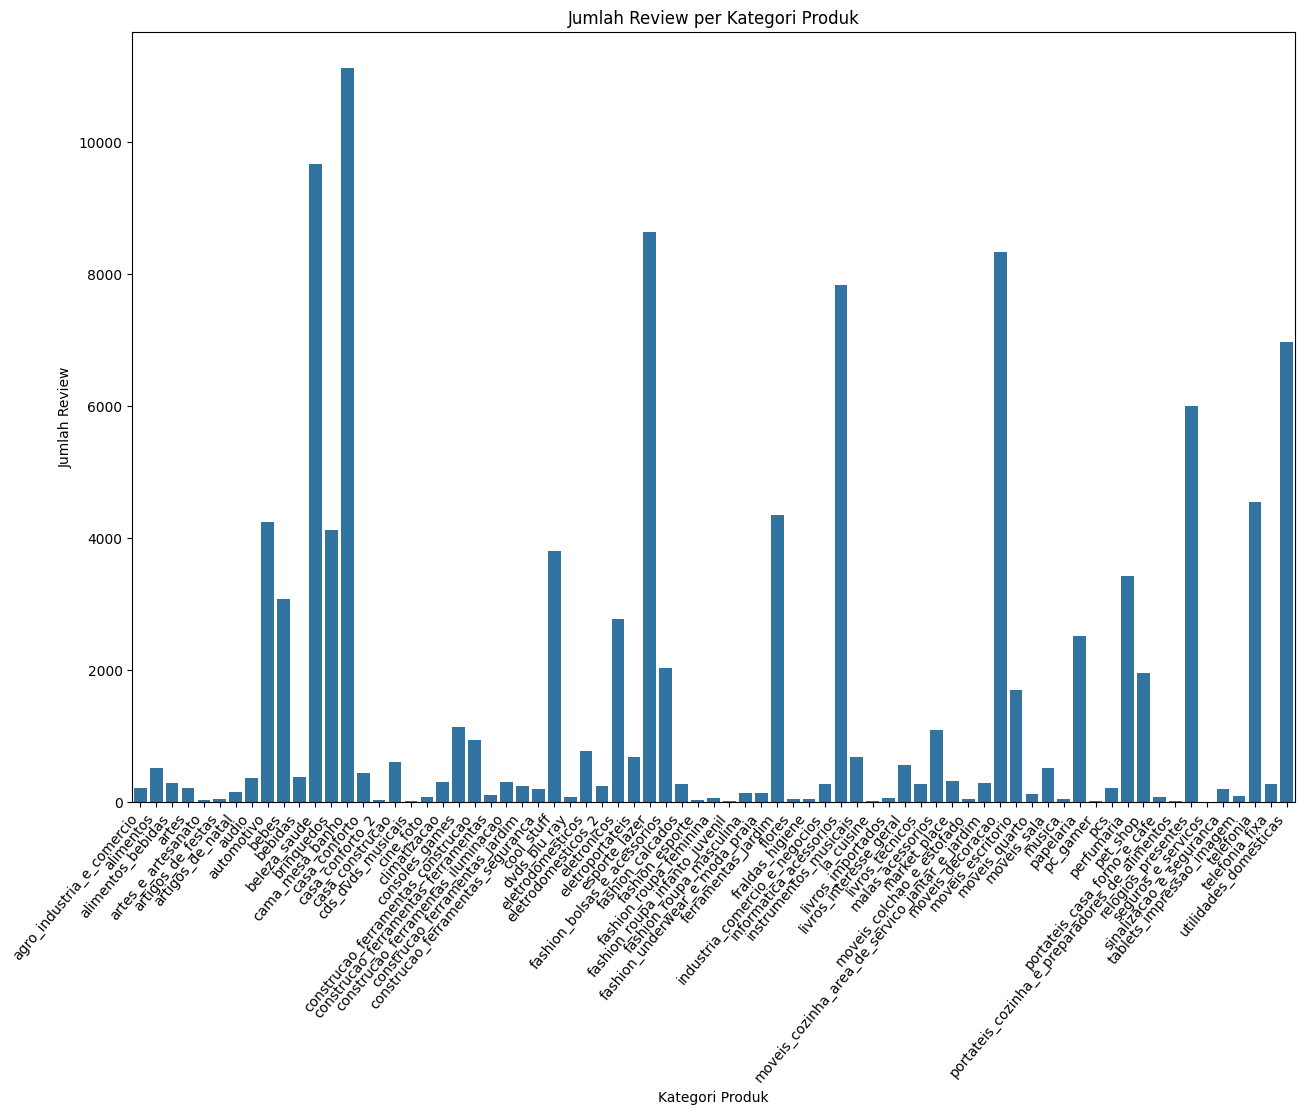

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Membaca data
products_dataset_df = pd.read_csv('/content/drive/MyDrive/E-Commerce Public Dataset/products_dataset.csv')
order_items_dataset_df = pd.read_csv('/content/drive/MyDrive/E-Commerce Public Dataset/order_items_dataset.csv')

# Gabungkan data products_dataset dan order_items_dataset berdasarkan product_id
merged_df = pd.merge(products_dataset_df, order_items_dataset_df, on='product_id', how='inner')

# Hitung jumlah review per kategori produk
category_reviews_count = merged_df.groupby('product_category_name')['order_item_id'].count()

# Visualisasikan jumlah review per kategori
plt.figure(figsize=(15, 10))
sns.barplot(x=category_reviews_count.index, y=category_reviews_count.values)
plt.xlabel("Kategori Produk")
plt.ylabel("Jumlah Review")
plt.title("Jumlah Review per Kategori Produk")
plt.xticks(rotation=50, ha="right")
plt.show()


## Conclusion

- Conclution pertanyaan 1:Secara keseluruhan, analisis ini memberikan wawasan berharga tentang produk yang memiliki daya tarik paling tinggi di pasar, membantu dalam pengambilan keputusan yang lebih baik terkait dengan strategi bisnis dan pemasaran.

- Conclution pertanyaan 2: Secara keseluruhan, analisis ini memberikan wawasan yang berguna untuk pengambilan keputusan strategis dalam pemasaran dan pengelolaan produk, serta membantu dalam merencanakan langkah-langkah selanjutnya untuk meningkatkan penjualan di pasar e-commerce.